# Import SQL database into Pandas

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from db_connection import user,ps,host,port
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
 # variables to populate the database connection string
db_user = user
db_password = ps
db_host = host
db_port = port

# This database must already exist
db_name = "employee_db"

In [3]:
#Create engine to connect to the DB
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Histogram to visualize the most common salary ranges for employees

In [4]:
salary = pd.read_sql_table("salaries",engine)
salary.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [5]:
x = salary["salary"]
x

0         60117
1         65828
2         40006
3         40054
4         78228
          ...  
300019    40000
300020    58058
300021    49597
300022    40000
300023    63707
Name: salary, Length: 300024, dtype: int64

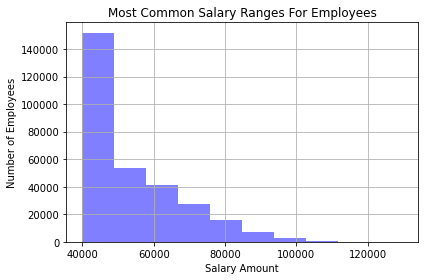

In [6]:
#create a bin
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)

plt.xlabel('Salary Amount')
plt.ylabel('Number of Employees')
plt.title('Most Common Salary Ranges For Employees')
plt.grid()
plt.tight_layout()
plt.show()

# Bar chart of average salary by title

In [7]:
query = '''
SELECT t.title,s.salary
FROM salaries AS s
INNER JOIN employees AS e
ON (s.emp_no = e.emp_no)
INNER JOIN titles AS t
ON e.emp_title = t.title_id;
'''

title_salary = pd.read_sql_query(query,engine)
title_salary.head()

,title,salary
0,Engineer,48973
1,Senior Engineer,40000
2,Technique Leader,43548
3,Staff,63377
4,Senior Engineer,40000


In [8]:
group_sal = title_salary.groupby(title_salary["title"])
avg_salary = group_sal["salary"].mean()
avg_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

In [9]:
average_salary_df = pd.DataFrame({'avg salary': avg_salary})
avg_sal = average_salary_df.reset_index()
avg_sal

,title,avg salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


/var/folders/jn/tzr4g2352zg3sq44kwsxrr_00000gn/T/ipykernel_1899/2383452969.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


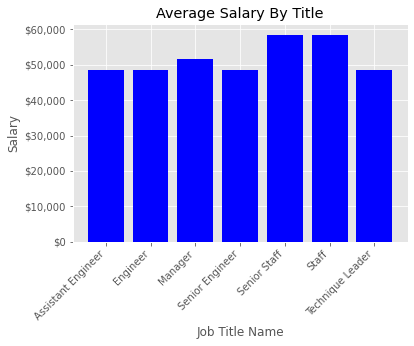

In [10]:
plt.style.use('ggplot')

x = avg_sal['title']
y = avg_sal['avg salary']


plt.bar(x, y, color='blue')
plt.xlabel("Job Title Name")
plt.ylabel("Salary")
plt.title("Average Salary By Title")

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# Format the labels on y-axis with dollar sign
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

plt.show()